# SD212: Graph mining

## Project

### Title: Node Classification using Personalised PageRank scheme for Graph Neural Networks

### Students: Ariel Ramos, Chenxi Deng

The objective of this project is to learn how to extract useful information from graph data. 

Your task is the following:
* build your own graph from real data
* specify the problem(s) you would like to solve
* provide a solution
* visualize the results

## Instructions

You can work in **teams of 2 or 3**.

Fill the following variable with the names of all students of this project separated by _:

In [1]:
name = 'Ramos_Deng'

You **must** use this name for the pickle file of your dataset and provide a link to this file:

In [2]:
# url to your dataset, to be modified
url = 'https://github.com/arielramos97/Graph-Mining-Project/tree/main/Data'

Check the notebook ``my_dataset`` to generate a pickle file in appropriate format (``Bunch`` object).

You must use the following name for your notebook:

In [3]:
# name of your notebook
name + '.ipynb'

'Ramos_Deng.ipynb'

## Data

In [4]:
#Upload dataset
import numpy as np

In [5]:
!wget -O 'spotify.npz' https://github.com/arielramos97/Graph-Mining-Project/raw/main/Data/spotify.npz

with np.load('spotify.npz', allow_pickle=True) as loader:
    dataset = dict(loader)

--2022-06-23 08:36:06--  https://github.com/arielramos97/Graph-Mining-Project/raw/main/Data/spotify.npz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/arielramos97/Graph-Mining-Project/main/Data/spotify.npz [following]
--2022-06-23 08:36:07--  https://raw.githubusercontent.com/arielramos97/Graph-Mining-Project/main/Data/spotify.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1320216 (1.3M) [application/octet-stream]
Saving to: ‘spotify.npz’

spotify.npz         100%[===================>]   1.26M  --.-KB/s    in 0.03s   

2022-06-23 08:36:07 (40.9 MB/s) - ‘spotify.npz’ saved [1320216/132

-> Spotify is one of the leading audio streaming and media services providers, which gives you access to millions of songs from artists of various genres. For this project, we aim to **classify artists by 14 different music genres** ('rock', 'trap latino', 'pop', 'pop rap', 'indie pop', 'dance pop', 'pop dance', 'soft rock', 'alternative r&b', 'rap', 'modern rock', 'latin', 'nigerian pop', 'uk pop') based on the calculated audio features of their top-5 tracks. 

-> The data used in this project was collected from [**Spotify WebAPI**]( https://developer.spotify.com/dashboard) using the spotipy library. With the Spotify Developer Platform, we were able to extract information on the artists, genres, tracks. 

-> Firstly, we collected the IDs of the top artists based on the top 200 most-streamed songs of this week. From there, we extracted lists of artists similar to the top artists (provided by Spotify based on a feature named ​ 'Fans Also Like').  A total of 2643 artists were used to construct the adjacency matrix. In order to determine the genres of the artists, we looked up their top 5 song tracks and extracted 9 related audio features (including danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo) of each track. 


## Data Distribution 

[Github link](https://raw.githubusercontent.com/arielramos97/Graph-Mining-Project/main/distribution_datasets.png)



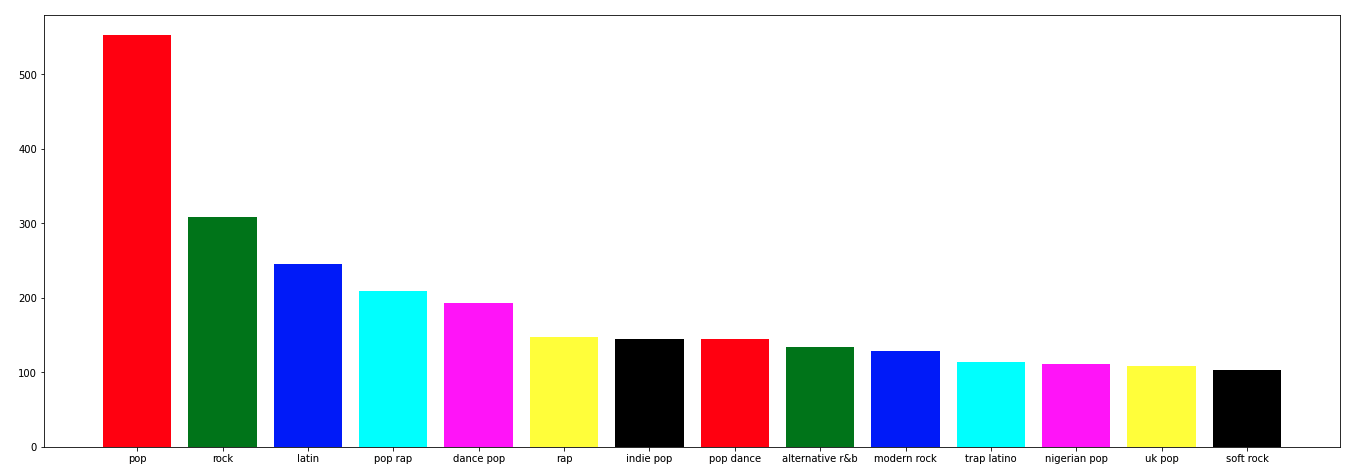

## Problem

In this project, we attempt to perform a supervised classification using graph neural networks with an improved propagation scheme (APPNP) that is based on personalised pagerank. We attempt to classify artists into their corresponding genres. For the training dataset, we use 20 samples per genre (14 genres). 


## Solution

The development of Graph Neural Networks has achieved great success for many network mining tasks such as semi-supervised classification. Nonetheless, they rely on an expensive message passing mechanism to propagate the information. This means that only nodes that are a few propagation steps away can be considered. 

Hence, a new propagation scheme was proposed by [[1]](https://arxiv.org/pdf/1810.05997.pdf) which decouples prediction and propagation, and solves the problem of limited range while outperforming several state-of-the-art methods for semi-supervised classification.

The propagation technique is based on a variant of PageRank (learned in the course) denominated Personalised PageRank which takes a root node into account for ranking the nodes. This in turn allows us to select the most important nodes (for each node) that will be used to perform the classification task. 

The model is denominated APPNP (Personalised propagation of neural predictions) and it achieves linear computational complexity by approximating topic-sensitive PageRank via power iteration:


<center>$Z^{(0)} = H = f_\theta(X)$

$Z^{(k+1)} = (1 - \alpha) \hat{\tilde{A}}Z^{(k)} + \alpha H $

$Z^{(k)} = softmax((1 - \alpha) \hat{\tilde{A}}Z^{(k-1)} + \alpha H) $</center>

where:

<center> 

$\hat{\tilde{A}}$ is the normalised adjacency matrix with self-loops

$X$ is the feature matrix

$f_\theta$ is a neural network with parameter set $\theta$ generating the predictions $H \in R^{nxd}$ </center>







[1] Reid Andersen, Fan Chung, and Kevin Lang. Local graph partitioning using pagerank vectors. In
Proceedings of the 47th Annual IEEE Symposium on Foundations of Computer Science, FOCS ’06,
page 475–486, USA, 2006. IEEE Computer Society.


In [6]:
%pip install scikit-network

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from IPython.display import SVG
from sknetwork.hierarchy import LouvainHierarchy, Paris, cut_straight
from sknetwork.ranking import PageRank, top_k
from sknetwork.clustering import Louvain, modularity
from sknetwork.linalg import normalize
from sknetwork.utils import membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph, svg_dendrogram,svg_bigraph
from scipy.sparse import csr_matrix

In [8]:
!wget -O 'spotify.npz' https://github.com/arielramos97/Graph-Mining-Project/raw/main/Data/spotify.npz

--2022-06-23 08:36:12--  https://github.com/arielramos97/Graph-Mining-Project/raw/main/Data/spotify.npz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/arielramos97/Graph-Mining-Project/main/Data/spotify.npz [following]
--2022-06-23 08:36:12--  https://raw.githubusercontent.com/arielramos97/Graph-Mining-Project/main/Data/spotify.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1320216 (1.3M) [application/octet-stream]
Saving to: ‘spotify.npz’

spotify.npz         100%[===================>]   1.26M  --.-KB/s    in 0.04s   

2022-06-23 08:36:12 (34.9 MB/s) - ‘spotify.npz’ saved [1320216/132

In [9]:
#Get APPNP model 
%rm -rf ppnp/
!git clone https://github.com/arielramos97/ppnp.git
%cd ppnp/
%pip uninstall tensorflow -y
%pip install -r requirements.txt
!python setup.py install

Cloning into 'ppnp'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 285 (delta 33), reused 29 (delta 15), pack-reused 226
Receiving objects: 100% (285/285), 9.32 MiB | 14.38 MiB/s, done.
Resolving deltas: 100% (166/166), done.
/content/ppnp
Found existing installation: tensorflow 1.15.5
Uninstalling tensorflow-1.15.5:
  Successfully uninstalled tensorflow-1.15.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-1.15.5-cp37-cp37m-manylinux2010_x86_64.whl (110.5 MB)
  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

running install
running bdist_egg
running egg_info
creating ppnp.egg-info
writing ppnp.egg-info/PKG-INFO
writing dependency_links to ppnp.egg-info/dependency_links.txt
writing top-level names to ppnp.egg-info/top_level.txt
writing manifest file 'ppnp.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'ppnp.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/ppnp
copying ppnp/__init__.py -> build/lib/ppnp
copying ppnp/preprocessing.py -> build/lib/ppnp
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/ppnp
copying build/lib/ppnp/__init__.py -> build/bdist.linux-x86_64/egg/ppnp
copying build/lib/ppnp/preprocessing.py -> build/bdist.linux-x86_64/egg/ppnp
byte-compiling build/bdist.linux-x86_64/egg/ppnp/__init__.py to __init__.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/ppnp/prep

In [10]:
import logging
import argparse
import os
import numpy as np
import tensorflow as tf
from ppnp.tensorflow import PPNP
from ppnp.tensorflow.training import train_model
from ppnp.tensorflow.earlystopping import stopping_args
from ppnp.tensorflow.propagation import PPRExact, PPRPowerIteration
from ppnp.data.io import load_dataset

import pandas as pd
import seaborn as sns
import time 
import warnings
warnings.filterwarnings('ignore')


In [11]:
tf.logging.set_verbosity(tf.logging.WARN)
logging.basicConfig(
        format='%(asctime)s: %(message)s',
        datefmt='%Y-%m-%d %H:%M:%S',
        level=logging.INFO + 2)

# Load dataset

In [12]:
graph_name ='/content/spotify.npz'
graph = load_dataset(graph_name)
graph.standardize(select_lcc=True)

<Undirected, unweighted and connected SparseGraph with 51678 edges (no self-loops). Data: adj_matrix (2643x2643), attr_matrix (2643x9), labels (2643), node_names (2643), class_names (14)>

# Set up data splits

In [13]:
test = True
seeds = [2144199730]
nknown = 1500
idx_split_args = {'ntrain_per_class': 20, 'nstopping': 500, 'nknown': nknown}

# Set up propagation

In [14]:
alpha = 0.1
prop_appnp = PPRPowerIteration(graph.adj_matrix, alpha=alpha, niter=10)

# Choose model hyperparameters

In [15]:
model_args = {
    'hiddenunits': [64],
    'reg_lambda': 5e-3,
    'learning_rate': 0.01,
    'keep_prob': 0.5,
    'propagation': prop_appnp}

# Train model

In [16]:
niter_per_seed = 5
save_result = False
print_interval = 100

In [18]:
start = time.time()

results = []
niter_tot = niter_per_seed * len(seeds)
i_tot = 0
for seed in seeds:
    idx_split_args['seed'] = seed
    for _ in range(niter_per_seed):
        i_tot += 1
        logging_string = f"Iteration {i_tot} of {niter_tot}"
        logging.log(22,
                logging_string + "\n                     "
                + '-' * len(logging_string))
        
        print(idx_split_args)
        result = train_model(
                graph_name, PPNP, graph, model_args, idx_split_args,
                stopping_args, test, save_result, None, print_interval)
        results.append({})
        results[-1]['stopping_accuracy'] = result['early_stopping']['accuracy']
        results[-1]['stopping_f1_score'] = result['early_stopping']['f1_score']
        results[-1]['valtest_accuracy'] = result['valtest']['accuracy']
        results[-1]['valtest_f1_score'] = result['valtest']['f1_score']
        results[-1]['runtime'] = result['runtime']
        results[-1]['runtime_perepoch'] = result['runtime_perepoch']
        results[-1]['split_seed'] = seed

total_time = time.time() - start
print(f"Runtime: {total_time:.2f}s")


2022-06-23 08:37:37: Iteration 1 of 5
                     ----------------
2022-06-23 08:37:37: Tensorflow seed: 4042342117


{'ntrain_per_class': 20, 'nstopping': 500, 'nknown': 1500, 'seed': 2144199730}


2022-06-23 08:38:50: Last step: 545, best step: 55 (72.012 sec)
2022-06-23 08:38:51: Test accuracy: 25.9%, test F1 score: 0.312
2022-06-23 08:38:51: Iteration 2 of 5
                     ----------------
2022-06-23 08:38:51: Tensorflow seed: 4042914459


{'ntrain_per_class': 20, 'nstopping': 500, 'nknown': 1500, 'seed': 2144199730}


2022-06-23 08:39:57: Last step: 544, best step: 26 (64.925 sec)
2022-06-23 08:39:57: Test accuracy: 22.8%, test F1 score: 0.230
2022-06-23 08:39:57: Iteration 3 of 5
                     ----------------
2022-06-23 08:39:57: Tensorflow seed: 1291582249


{'ntrain_per_class': 20, 'nstopping': 500, 'nknown': 1500, 'seed': 2144199730}


2022-06-23 08:40:47: Last step: 411, best step: 311 (48.483 sec)
2022-06-23 08:40:47: Test accuracy: 19.8%, test F1 score: 0.323
2022-06-23 08:40:47: Iteration 4 of 5
                     ----------------
2022-06-23 08:40:47: Tensorflow seed: 3493459601


{'ntrain_per_class': 20, 'nstopping': 500, 'nknown': 1500, 'seed': 2144199730}


2022-06-23 08:41:28: Last step: 326, best step: 35 (39.092 sec)
2022-06-23 08:41:28: Test accuracy: 24.0%, test F1 score: 0.235
2022-06-23 08:41:28: Iteration 5 of 5
                     ----------------
2022-06-23 08:41:28: Tensorflow seed: 2984505013


{'ntrain_per_class': 20, 'nstopping': 500, 'nknown': 1500, 'seed': 2144199730}


2022-06-23 08:42:21: Last step: 428, best step: 42 (51.511 sec)
2022-06-23 08:42:21: Test accuracy: 25.2%, test F1 score: 0.240


Runtime: 284.00s


# Evaluation

In [19]:
result_df = pd.DataFrame(results)
result_df.head()

,stopping_accuracy,stopping_f1_score,valtest_accuracy,valtest_f1_score,runtime,runtime_perepoch,split_seed
0,0.272,0.316748,0.258968,0.311823,72.012460,0.131891,2144199730
1,0.226,0.232633,0.228346,0.230097,64.924514,0.119128,2144199730
2,0.204,0.329316,0.197725,0.323100,48.482516,0.117676,2144199730
3,0.254,0.238248,0.239720,0.235303,39.091943,0.119547,2144199730
4,0.242,0.240476,0.251969,0.239713,51.510535,0.120071,2144199730


Conclusion: In this project, we used improved propagation scheme (APPNP) to perform classification. We obtained an accuracy of ~26%. The reasons for the relatively low accuracy could be that most of the genres in the current dataset are correlated to one another (e.g. 'pop', 'pop rap', 'indie pop', 'dance pop', 'pop dance'). 
The second reason could be that the datset we used is relatively small, due to the long retrival time with the use of the API platform. Finally, mostly of the artists can be classified into several genres. However, we attempted to assign only the top genre to each artist. 

# Visualisation (more analysis)

In [21]:
dataset

{'adj_matrix.data': array([2, 1, 1, ..., 1, 2, 1]),
 'adj_matrix.indices': array([ 146,  174,  507, ..., 2315, 2368, 2577], dtype=int32),
 'adj_matrix.indptr': array([    0,    12,    29, ..., 51610, 51662, 51678], dtype=int32),
 'adj_matrix.shape': array([2643, 2643]),
 'attr_matrix.data': array([ 0.55,  0.4 , -9.62, ...,  0.16,  0.48, 89.04]),
 'attr_matrix.indices': array([0, 1, 2, ..., 6, 7, 8], dtype=int32),
 'attr_matrix.indptr': array([    0,     8,    16, ..., 21888, 21896, 21904], dtype=int32),
 'attr_matrix.shape': array([2643,    9]),
 'class_names': array(['rock', 'trap latino', 'pop', 'pop rap', 'indie pop', 'dance pop',
        'pop dance', 'soft rock', 'alternative r&b', 'rap', 'modern rock',
        'latin', 'nigerian pop', 'uk pop'], dtype='<U15'),
 'labels': array([ 2,  2, 11, ...,  2, 11,  2]),
 'node_names': array(['spotify:artist:00OF0nwYaoBSO3AnPVq3vE',
        'spotify:artist:00TKPo9MxwZ0j4ooveIxWZ',
        'spotify:artist:00XhexlJEXQstHimpZN910', ...,
        '

In [22]:
# different genres
dataset['class_names']

array(['rock', 'trap latino', 'pop', 'pop rap', 'indie pop', 'dance pop',
       'pop dance', 'soft rock', 'alternative r&b', 'rap', 'modern rock',
       'latin', 'nigerian pop', 'uk pop'], dtype='<U15')

In [23]:
len(set(dataset['labels']))

14

In [24]:
# each node is the ID of the artist
dataset['node_names'][0]

'spotify:artist:00OF0nwYaoBSO3AnPVq3vE'

In [25]:
# recontruct adjacency matrix
data = dataset['adj_matrix.data']
indices = dataset['adj_matrix.indices']
indptr = dataset['adj_matrix.indptr']
adj_matrix = csr_matrix((data,indices, indptr))

In [26]:
adj_matrix.shape

(2643, 2643)

## Cluster graphs - Louvain 

In [27]:
louvain = Louvain(resolution=0.5)

In [28]:
labels = louvain.fit_transform(adj_matrix)
labels_pred = dataset['labels']

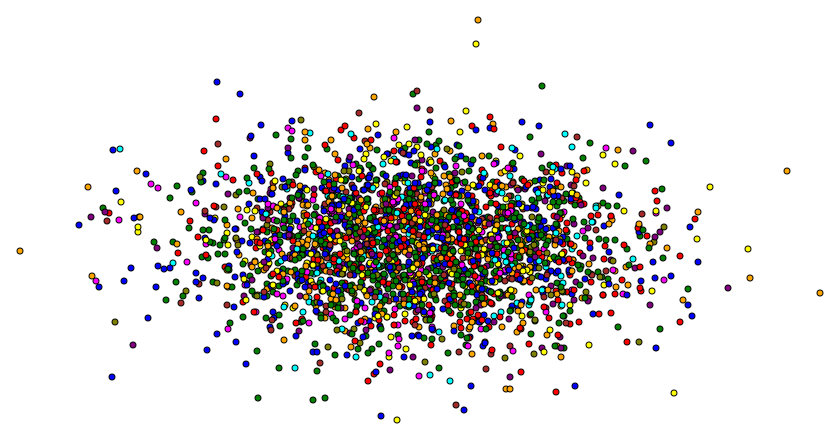

In [29]:
image = svg_graph(adj_matrix, labels=labels_pred, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

In [30]:
modularity(adj_matrix, labels_pred, return_all=True)

(0.6188544545116332, 0.7253370770085695, 0.10648262249693627)

In [31]:
adjacency_aggregate = louvain.aggregate_
adjacency_aggregate

<14x14 sparse matrix of type '<class 'numpy.float64'>'
	with 90 stored elements in Compressed Sparse Row format>

In [32]:
membership = membership_matrix(labels_pred)
print(membership.shape)

(2643, 14)


In [33]:
averaging = normalize(membership.T.tocsr()).T

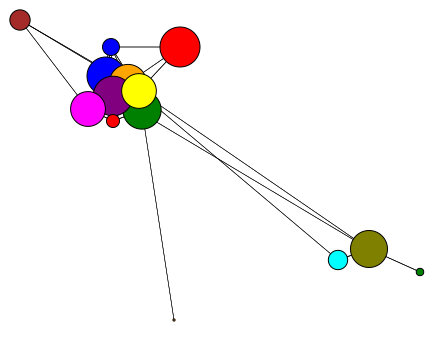

In [34]:
image = svg_graph(adjacency_aggregate, labels=np.arange(len(set(labels_pred))), display_node_weight=True)
SVG(image)